In [101]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.linear_model import LinearRegression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt

#  Import and read the csv.
import pandas as pd 
happiness_df = pd.read_csv("Cleaned_Data/World_Happiness_Report_2021.csv")
happiness_df

,Country,Year,World_Region,Happiness_Score,Economic_Production,Social_Support,Life_Expectancy,Freedom,Generosity,Perceptions_of_Corruption
0,Finland,2021,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,2021,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,2021,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,2021,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,2021,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,2021,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,2021,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,2021,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,2021,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821


In [102]:
# Split our preprocessed data into our features and target arrays
y = happiness_df["Happiness_Score"] # y = dependent = ladder score
X = happiness_df[["Economic_Production", "Social_Support", "Life_Expectancy", "Freedom", "Generosity", "Perceptions_of_Corruption"]] # X = independent = any other variable



# Split the preprocessed data into a training and testing dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [103]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [104]:
# Introduce regressor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [105]:
# Print the intercept and coefficients
print("Intercept: ", regressor.intercept_)
print("Coefficients:")
list(zip(X, regressor.coef_))

Intercept:  -2.2576541745553502
Coefficients:


[('Economic_Production', 0.26799399259129997),
 ('Social_Support', 2.5960215315332777),
 ('Life_Expectancy', 0.03722141672206595),
 ('Freedom', 1.6581393640886823),
 ('Generosity', 0.41557962040934926),
 ('Perceptions_of_Corruption', -0.7724537701055025)]

In [106]:
# Create vector of predictions
y_pred = regressor.predict(X_test)

In [107]:
print(f"Prediction: {y_pred}")

Prediction: [6.29562789 6.51270075 5.16896857 5.78904709 6.62533387 7.52699374
 5.56720855 4.37840266 5.41866627 4.28446025 5.47432289 6.79911925
 5.72925565 6.96959689 6.41792369 5.96468453 4.52671607 5.57605751
 6.3960754  5.05952524 5.5847203  4.91113615 6.42794627 3.48094202
 5.69282126 4.14655167 4.7569325  4.1527198  5.75088867 6.37820559]


In [108]:
# Show actual value with predicted value
regressor_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
values = regressor_diff.sort_values('Actual value', ascending=False)
values

,Actual value,Predicted value
9,7.268,6.969597
12,7.155,6.799119
18,6.951,6.512701
19,6.834,6.417924
26,6.491,6.427946
29,6.435,5.584720
30,6.431,6.378206
31,6.377,7.526994
36,6.309,5.729256
45,6.140,5.750889


In [109]:
#Model Evaluation
from sklearn import metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(regressor.score(X, y)))
print('Mean Absolute Error:', MAE)
print('Mean Square Error:', MSE)
print('Root Mean Square Error:', RMSE)

R squared: 0.75
Mean Absolute Error: 0.5388621020890881
Mean Square Error: 0.41214786481566873
Root Mean Square Error: 0.6419874335340753


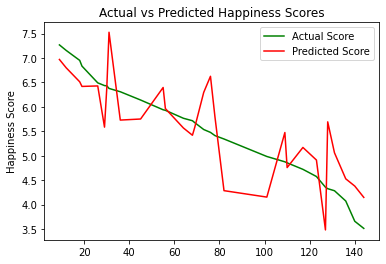

In [110]:
actual = values['Actual value']
predicted = values['Predicted value']

fig, ax = plt.subplots()

ax.plot(actual, color = 'green', label = 'Actual Score')
ax.plot(predicted, color = 'red', label = 'Predicted Score')
ax.set(xlabel='', ylabel='Happiness Score',
       title='Actual vs Predicted Happiness Scores');
ax.legend(loc = 'upper right')
plt.show()